In [1]:
% some housekeeping stuff
%register_graphics_toolkit ("notebook");
register_graphics_toolkit ("plotly");
clear
format short e
% end of housekeeping

# Buffering  
### Strong Acid
Consider a strong acid. Titrate with a strong base.  
![](titrate.png)  
charge balance  
base: NaOH; acid: HCl  
$\mathrm{[H^+]+[Na^+] = [OH^-] + [Cl^-]}$  
$\mathrm{[H^+]+ Na_T = \frac{K_{CT}}{[H^+]} + Cl_T}$  
$\mathrm{Na_T = \frac{Kw}{[H^+]} + Cl_T - [H^+]}$

define buffer capacity, B  
$\mathrm{B = \frac{d Na_T}{dpH}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$= \mathrm{\frac{dNa_T}{d[H^+]} * \frac{d[H^+]}{dpH}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Term 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Term 2  

term 1: $\mathrm{\frac{dNa_T}{d[H^+]} = \frac{d(\frac{K_{w}}{[H^+]} + Cl_T - [H^+])}{d[H^+]}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{=\frac{-K_{CT}}{[H^+]^2} + 0 - 1}$

term 2: 
$\mathrm{\frac{d[H^+]}{dpH}}$  
easier: $\mathrm{\frac{dpH}{d[H^+]}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{=\frac{\frac{-1}{2.303} d ln[H^+]}{d[H^+]}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{=\frac{-1}{2.303[H^+]}}$  
so $\mathrm{\frac{d[H^+]}{dpH}} = -2.303[H^+]$

B = term 1 x term 2  
&nbsp;&nbsp;&nbsp;$\mathrm{=(\frac{-K_{w}}{[H^+]^2} - 1)(-2.303[H^+])}$  
> $\mathrm{B = 2.303(\frac{K_{CT}}{[H^+]} + H^+)}$

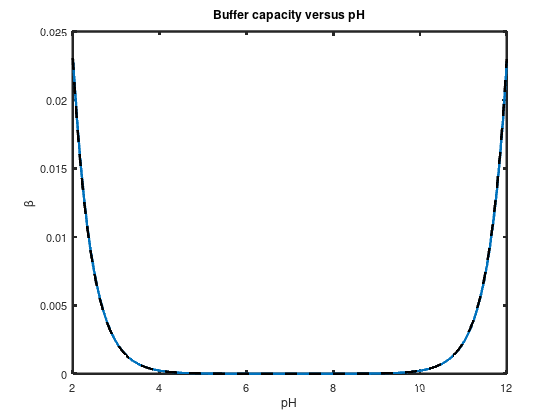

In [2]:
Kw=1e-14; pH=2:0.01:12; H=10.^-pH; OH=Kw./H; ClT=0.01; Na=ClT+OH-H;

%plot -s 600,600 -f 'svg'
beta=diff(Na)./diff(pH);
n=size(pH,2); pHder=pH(1:n-1)+diff(pH);
plot(pHder,(beta),'linewidth',2)
xlabel('pH'); ylabel('\beta')
set(gca,'linewidth',2,'fontsize',11)
title('Buffer capacity versus pH')

betamodel=2.303*(OH+H);
hold on
plot(pH,betamodel,'k--','linewidth',2)

### Weak Acid Buffer Intensity  
HAc add NaOH  
charge balance  
$\mathrm[H^+] + [Na^+] = [Ac^-] + [OH^-]$  
has one unknown  
$\mathrm{[H^+] + Na_T = \frac{KaAT}{Ka + [H^+]} + \frac{Kw}{[H^+]}}$  
$\mathrm{HAc = H^+ + Ac^-}$  
$\mathrm{Ac^- + H_2O = HAc + OH^-}$

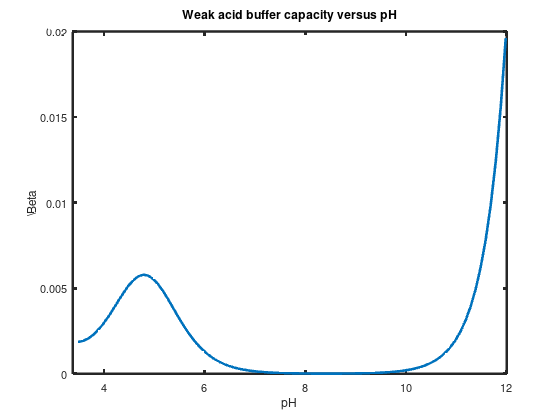

In [3]:
%plot -s 600,500 -f 'svg'
Kw=1e-14; pH=3.38:0.1:12; H=10.^-pH; OH=Kw./H; AcT=0.01; Ka=10^-4.75;
Na=OH+(AcT*Ka)./(Ka+H)-H;

beta=diff(Na)./diff(pH);
n=size(pH,2); pHder=pH(1:n-1)+diff(pH);
plot(pHder,beta,'linewidth',2)
xlabel('pH'); ylabel('\Beta')
set(gca,'linewidth',2,'fontsize',11)
title('Weak acid buffer capacity versus pH')
axis([3.38 12 0 0.02])